# Limpieza de datos Proyecto 1

Analitica Computacional para la toma de decisiones

Departamento de Ingeniería Industrial

Universidad de los Andes



**Integrantes:** Sofia Vasquez, Isabella Caputi, Maria Paula Ospina

# Carga de datos

In [141]:
import numpy as np
import pandas as pd

In [142]:
df = pd.read_csv("Datos_Atlantico.csv", sep=",")

Se cargó el conjunto de datos utilizando pandas y se realizó una inspección inicial de la estructura del conjunto de datos.

In [143]:
df.head()

,periodo,estu_genero,fami_estratovivienda,fami_educacionmadre,fami_educacionpadre,fami_tieneinternet,fami_tienecomputador,cole_area_ubicacion,cole_naturaleza,cole_jornada,cole_mcpio_ubicacion,punt_global,punt_matematicas,punt_lectura_critica,punt_c_naturales,punt_sociales_ciudadanas,punt_ingles
0,20224,F,Estrato 1,Secundaria (Bachillerato) incompleta,Secundaria (Bachillerato) incompleta,No,No,URBANO,OFICIAL,MAÑANA,BARRANQUILLA,171.0,43.0,34.0,34.0,26.0,33.0
1,20224,M,Estrato 1,Secundaria (Bachillerato) incompleta,Técnica o tecnológica completa,Si,No,URBANO,OFICIAL,UNICA,SOLEDAD,332.0,67.0,72.0,68.0,58.0,67.0
2,20224,M,Sin Estrato,Secundaria (Bachillerato) incompleta,Técnica o tecnológica completa,No,NaN,URBANO,OFICIAL,UNICA,SOLEDAD,174.0,41.0,33.0,32.0,35.0,30.0
3,20224,M,Estrato 3,Técnica o tecnológica completa,Técnica o tecnológica completa,Si,No,URBANO,OFICIAL,UNICA,SABANALARGA,311.0,63.0,68.0,62.0,60.0,50.0
4,20224,M,Estrato 2,Primaria incompleta,Secundaria (Bachillerato) completa,Si,Si,URBANO,OFICIAL,UNICA,BARRANQUILLA,311.0,66.0,68.0,65.0,53.0,53.0


Como se observa, cada registro representa un estudiante e incluye variables demográficas, socioeconómicas, características del establecimiento educativo y resultados académicos. Las variables demográficas incluyen el género del estudiante (estu_genero) y el municipio de ubicación del colegio (cole_mcpio_ubicacion). Entre las variables socioeconómicas estan: el estrato de la vivienda (fami_estratovivienda), el nivel educativo de la madre y del padre,  el acceso a internet y computador en el hogar.

En cuanto al contexto educativo, se incluyen características del colegio como el área de ubicación (urbano), naturaleza (oficial) y jornada académica. Finalmente, se presentan los puntajes obtenidos en las distintas áreas evaluadas (Matemáticas, Lectura Crítica, Ciencias Naturales, Sociales e Inglés), y el puntaje global (el total de todas las areas).

# Manejo Datos faltantes

 Se revisaron los tipos de datos y la cantidad de valores nulos por variable con el fin de evaluar la calidad de los datos antes de iniciar el proceso de limpieza.

In [144]:
df.isna()

,periodo,estu_genero,fami_estratovivienda,fami_educacionmadre,fami_educacionpadre,fami_tieneinternet,fami_tienecomputador,cole_area_ubicacion,cole_naturaleza,cole_jornada,cole_mcpio_ubicacion,punt_global,punt_matematicas,punt_lectura_critica,punt_c_naturales,punt_sociales_ciudadanas,punt_ingles
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389443,False,False,False,False,False,False,False,False,False,False,False,True,False,True,True,True,False
389444,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
389445,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
389446,False,False,False,False,False,False,False,False,False,False,False,True,False,True,True,True,False


In [145]:
df.isna().sum(axis=0)

,0
periodo,0
estu_genero,180
fami_estratovivienda,11534
fami_educacionmadre,10327
fami_educacionpadre,10142
fami_tieneinternet,10201
fami_tienecomputador,7194
cole_area_ubicacion,187
cole_naturaleza,0
cole_jornada,0


In [146]:
df.shape

(389448, 17)

Durante el análisis de calidad de datos se identificó que algunas variables presentaban valores faltantes. El caso más relevante corresponde a las variables de puntaje (punt_global, punt_lectura_critica, punt_c_naturales y punt_sociales_ciudadanas), que presentaban aproximadamente un **35% de valores nulos.**

In [147]:
df.isna().sum()/df.shape[0]*100

,0
periodo,0.000000
estu_genero,0.046219
fami_estratovivienda,2.961628
fami_educacionmadre,2.651702
fami_educacionpadre,2.604199
fami_tieneinternet,2.619348
fami_tienecomputador,1.847230
cole_area_ubicacion,0.048017
cole_naturaleza,0.000000
cole_jornada,0.000000


Aunque el porcentaje de valores faltantes para el puntaje globbal es alto (35.29%), se decidió eliminar estos registros porque:

*   El puntaje global es la variable principal de análisis de negocio
*   Los registros sin puntaje no permiten evaluar desempeño académico
*   Mantenerlos introduciría sesgos en cálculos de promedio y comparaciones
*   No es metodológicamente ni eticamente correcto imputar puntajes académicos con valores artificiales
* Si fueramos a sumar los resultados de ingles y matematicas (los unicos completos), el nuevo puntaje global seria muy bajo a comparacion de aquellos que fueron evaluados en todas las areas.

En este caso, los valores faltantes no son errores aleatorios sino que aprecen corresponder a uno de dos casos: 1. evaluaciones incompletas o 2. periodos con esquemas de evaluación distintos. Por ello, concluimos utilizar los registros que contaran con información válida de desempeño. Esta decisión garantiza consistencia analítica, aun cuando reduce el tamaño del conjunto de datos.

In [148]:
df = df[df["punt_global"].notna()]

In [149]:
score_cols = [
    "punt_global",
    "punt_matematicas",
    "punt_lectura_critica",
    "punt_c_naturales",
    "punt_sociales_ciudadanas",
    "punt_ingles"
]

df = df.dropna(subset=score_cols)

In [150]:
df.shape

(252004, 17)

In [151]:
df.isna().sum()/df.shape[0]*100

,0
periodo,0.000000
estu_genero,0.070237
fami_estratovivienda,4.481278
fami_educacionmadre,3.967001
fami_educacionpadre,3.903509
fami_tieneinternet,3.997556
fami_tienecomputador,2.728925
cole_area_ubicacion,0.000000
cole_naturaleza,0.000000
cole_jornada,0.000000


Ahora bien, las variables socioeconómicas (fami_estratovivienda, fami_educacionmadre, fami_educacionpadre, fami_tieneinternet, fami_tienecomputador, estu_genero) presentaban entre 1.8% y 3% de valores faltantes.

Teniendo en cuenta que: el porcentaje de nulos es bajo, son variables categóricas y no representan la variable objetivo del análisis, se decidió imputar estos valores con la categoría "No reporta". Esto permie que se conserve la mayoria de registros, se evite eliminar observaciones de manera innecesaria, se mantenga la naturaleza categorica de las variables y no se introduzca distorsion numerica en los resultados.

In [152]:
categorical_cols = [
    "fami_estratovivienda",
    "fami_educacionmadre",
    "fami_educacionpadre",
    "estu_genero"
]

for col in categorical_cols:
    df[col] = df[col].fillna("No reporta")

Las variables fami_tieneinternet y fami_tienecomputador fueron imputadas reemplazando los valores faltantes por 'No', ya que el porcentaje de datos faltantes es bajo. En este contexto, asumir que la no respuesta se aproxima a la ausencia del recurso permite evitar la pérdida de registros en el análisis.En contraste, la variable fami_estratovivienda se dejó con valores NaN debido a que es una variable ordinal que representa el nivel socioeconómico del hogar. Imputar un valor implicaría asumir una condición económica para varias familia sin evidencia, lo que podría introducir sesgo en los resultados. Por esta razon, se optó por no modificar los datos faltantes en este caso.

In [153]:
df['fami_tieneinternet'] = df['fami_tieneinternet'].fillna('No')
df['fami_tienecomputador'] = df['fami_tienecomputador'].fillna('No')

In [154]:
df.isna().sum()/df.shape[0]*100

,0
periodo,0.0
estu_genero,0.0
fami_estratovivienda,0.0
fami_educacionmadre,0.0
fami_educacionpadre,0.0
fami_tieneinternet,0.0
fami_tienecomputador,0.0
cole_area_ubicacion,0.0
cole_naturaleza,0.0
cole_jornada,0.0


# Analisis Descriptivo

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 252004 entries, 0 to 389445
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   periodo                   252004 non-null  int64  
 1   estu_genero               252004 non-null  object 
 2   fami_estratovivienda      252004 non-null  object 
 3   fami_educacionmadre       252004 non-null  object 
 4   fami_educacionpadre       252004 non-null  object 
 5   fami_tieneinternet        252004 non-null  object 
 6   fami_tienecomputador      252004 non-null  object 
 7   cole_area_ubicacion       252004 non-null  object 
 8   cole_naturaleza           252004 non-null  object 
 9   cole_jornada              252004 non-null  object 
 10  cole_mcpio_ubicacion      252004 non-null  object 
 11  punt_global               252004 non-null  float64
 12  punt_matematicas          252004 non-null  float64
 13  punt_lectura_critica      252004 non-null  float6

In [156]:
df.describe()

,periodo,punt_global,punt_matematicas,punt_lectura_critica,punt_c_naturales,punt_sociales_ciudadanas,punt_ingles
count,252004.000000,252004.000000,252004.000000,252004.000000,252004.000000,252004.000000,252004.000000
mean,20183.848395,247.406763,49.576019,51.526765,49.045408,47.480060,50.371220
std,28.711235,51.636031,12.074886,10.682379,10.816085,11.937481,13.169147
min,20142.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20162.000000,208.000000,41.000000,44.000000,41.000000,38.000000,41.000000
50%,20194.000000,242.000000,49.000000,51.000000,48.000000,47.000000,48.000000
75%,20211.000000,282.000000,57.000000,59.000000,56.000000,56.000000,57.000000
max,20224.000000,483.000000,100.000000,100.000000,100.000000,100.000000,100.000000


Como se observa en el analisis dscriptivo, el conjunto de datos analizado está compuesto por 252.004 registros y 17 variables, sin presencia de valores nulos despues de la limpieza, lo que garantiza consistencia y calidad en la información. El tamaño de la muestra es considerablemente amplio, lo que permite realizar inferencias con un alto nivel de confiabilidad estadística. Ahora bien, tambien verificamos que no hubiera negativos y no hubiera valores absurdamente altos para los puntajes. En este caso todo parece en orden.

En cuanto a los resultados académicos, el puntaje global presenta una media de 247.4 puntos y una mediana de 242, con una desviación estándar de 51.6. La cercanía entre la media y la mediana sugiere una distribución relativamente equilibrada, aunque con una ligera asimetría positiva, posiblemente influenciada por puntajes altos. El rango observado va desde 0 hasta 483 puntos, lo que indica una variabilidad amplia en el desempeño general. Al analizar las competencias individuales, los puntajes promedio se sitúan alrededor de los 50 puntos. Lectura Crítica presenta el promedio más alto (51.5), seguida de Inglés (50.4) y Matemáticas (49.6). Ciencias Naturales registra una media de 49.0, mientras que Sociales y Ciudadanas muestra el promedio más bajo (47.5). En todas las áreas, la mediana es muy cercana a la media, lo que sugiere distribuciones relativamente simétricas y sin sesgos extremos pronunciados. La dispersión de los resultados es moderada, con desviaciones estándar que oscilan entre 10 y 13 puntos en las pruebas por competencia, siendo Inglés la que presenta mayor variabilidad. Además, se indica que el 50% central de los estudiantes se concentra aproximadamente entre 41 y 57 puntos en cada área, lo que evidencia una concentración significativa en niveles de desempeño medios.

En términos generales, los resultados muestran un desempeño promedio relativamente homogéneo entre las diferentes competencias, sin diferencias drásticas entre áreas. Sin embargo, Sociales y Ciudadanas presenta el nivel promedio más bajo, lo que podría sugerir una oportunidad de mejora en esta competencia específica.


# Manejo de Variables Categoricas

En primer lugar, las variables binarias fami_tieneinternet y fami_tienecomputador fueron transformadas a formato numérico, asignando el valor 1 a “Sí” y 0 a “No”. Esta transformación permite incluir estas variables en análisis cuantitativos, cálculos de correlación, evitando mantenerlas como texto y facilitando su interpretación.

In [157]:
df['fami_tieneinternet'] = df['fami_tieneinternet'].map({'Si':1, 'No':0})
df['fami_tienecomputador'] = df['fami_tienecomputador'].map({'Si':1, 'No':0})

Posteriormente, varias variables categóricas nominales: estu_genero, cole_area_ubicacion, cole_naturaleza, cole_jornada, cole_mcpio_ubicacion, fami_educacionmadre y fami_educacionpadre, fueron convertidas al tipo category. Esta decisión optimiza el uso de memoria y mejora la eficiencia en el manejo estadístico, sin imponer un orden artificial entre categorías que son puramente nominales.

In [158]:
cols_nominales = [
    'estu_genero',
    'cole_area_ubicacion',
    'cole_naturaleza',
    'cole_jornada',
    'cole_mcpio_ubicacion',
    'fami_educacionmadre',
    'fami_educacionpadre',
]

for col in cols_nominales:
    df[col] = df[col].astype('category')

En el caso de la variable fami_estratovivienda, inicialmente contenía valores como “Estrato 1”, “Estrato 2”, hasta “Estrato 6”, además de categorías como “Sin Estrato” y “No reporta”. Se extrajo el componente numérico del texto para convertirlo en una variable ordinal de tipo numérico (float), permitiendo su uso en análisis comparativos según nivel socioeconómico. De esta manera, el estrato puede interpretarse como una variable con orden natural entre 1 y 6.

In [159]:
df['fami_estratovivienda'].unique()

array(['Estrato 1', 'Sin Estrato', 'Estrato 3', 'Estrato 2', 'Estrato 4',
       'No reporta', 'Estrato 5', 'Estrato 6'], dtype=object)

Adicionalmente, se revisaron todas las categorias de las otras variables para revisar si hay inconsistencias.

In [160]:
df['estu_genero'].unique()

['F', 'M', 'No reporta']
Categories (3, object): ['F', 'M', 'No reporta']

In [161]:
df['cole_area_ubicacion'].unique()

['URBANO', 'RURAL']
Categories (2, object): ['RURAL', 'URBANO']

In [162]:
df['cole_jornada'].unique()

['MAÑANA', 'UNICA', 'NOCHE', 'COMPLETA', 'TARDE', 'SABATINA']
Categories (6, object): ['COMPLETA', 'MAÑANA', 'NOCHE', 'SABATINA', 'TARDE', 'UNICA']

In [163]:
df['cole_mcpio_ubicacion'].unique()

['BARRANQUILLA', 'SOLEDAD', 'SABANALARGA', 'REPELÓN', 'JUAN DE ACOSTA', ..., 'CUCUTA', 'VILLAVICENCIO', 'EL PIÑON', 'REMOLINO', 'ZAPAYAN']
Length: 85
Categories (85, object): ['AGUACHICA', 'ARGELIA', 'ARJONA', 'ARROYOHONDO', ..., 'VILLAVICENCIO',
                          'YOPAL', 'ZAPAYAN', 'ZAPAYÁN']

In [164]:
df['fami_educacionmadre'].unique()

['Secundaria (Bachillerato) incompleta', 'Técnica o tecnológica completa', 'Primaria incompleta', 'Técnica o tecnológica incompleta', 'Primaria completa', ..., 'No reporta', 'No sabe', 'Ninguno', 'Postgrado', 'No Aplica']
Length: 13
Categories (13, object): ['Educación profesional completa', 'Educación profesional incompleta', 'Ninguno',
                          'No Aplica', ..., 'Secundaria (Bachillerato) completa',
                          'Secundaria (Bachillerato) incompleta', 'Técnica o tecnológica completa',
                          'Técnica o tecnológica incompleta']

In [165]:
df['fami_educacionpadre'].unique()

['Secundaria (Bachillerato) incompleta', 'Técnica o tecnológica completa', 'Secundaria (Bachillerato) completa', 'Educación profesional completa', 'Técnica o tecnológica incompleta', ..., 'No reporta', 'Ninguno', 'Primaria completa', 'Postgrado', 'Educación profesional incompleta']
Length: 13
Categories (13, object): ['Educación profesional completa', 'Educación profesional incompleta', 'Ninguno',
                          'No Aplica', ..., 'Secundaria (Bachillerato) completa',
                          'Secundaria (Bachillerato) incompleta', 'Técnica o tecnológica completa',
                          'Técnica o tecnológica incompleta']

Se observo que en las variables de educación de madre y padre se agruparon las categorías relacionadas con ausencia de información (por ejemplo, “No aplica”, “No reporta”, “No sabe”) bajo una sola categoría denominada “SIN INFORMACION”. Esto mejora la consistencia del análisis y evita fragmentar los datos en múltiples categorías con el mismo significado conceptual. Finalmente, se eliminaron categorías no utilizadas para mantener un conjunto de datos más limpio y coherente.

In [166]:
valores_sin_info = ['NO APLICA', 'NO REPORTA', 'NO SABE']

df['fami_educacionmadre'] = df['fami_educacionmadre'].replace(valores_sin_info, 'SIN INFORMACION')
df['fami_educacionpadre'] = df['fami_educacionpadre'].replace(valores_sin_info, 'SIN INFORMACION')

df['fami_educacionmadre'] = df['fami_educacionmadre'].cat.remove_unused_categories()
df['fami_educacionpadre'] = df['fami_educacionpadre'].cat.remove_unused_categories()

In [167]:
df['fami_estratovivienda'] = df['fami_estratovivienda'].str.extract('(\d)').astype(float)

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-524/3776328002.py:1: SyntaxWarning: invalid escape sequence '\d'
  df['fami_estratovivienda'] = df['fami_estratovivienda'].str.extract('(\d)').astype(float)


Al final, observamos la transformacion exitosa de todas las variables, ya que se definen con tipos de variables que son manejables para un posterior analisis de datos.

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 252004 entries, 0 to 389445
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   periodo                   252004 non-null  int64   
 1   estu_genero               252004 non-null  category
 2   fami_estratovivienda      236074 non-null  float64 
 3   fami_educacionmadre       252004 non-null  category
 4   fami_educacionpadre       252004 non-null  category
 5   fami_tieneinternet        252004 non-null  int64   
 6   fami_tienecomputador      252004 non-null  int64   
 7   cole_area_ubicacion       252004 non-null  category
 8   cole_naturaleza           252004 non-null  category
 9   cole_jornada              252004 non-null  category
 10  cole_mcpio_ubicacion      252004 non-null  category
 11  punt_global               252004 non-null  float64 
 12  punt_matematicas          252004 non-null  float64 
 13  punt_lectura_critica      252004 n

# Duplicados

Ejectutamos este comando, el cual identifica los registros duplicados en todas las variables. Esto se hizo para nuestro conjunto de datos con el fin de garantizar la calidad y consistencia de la información.

In [169]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
389439,False
389440,False
389441,False
389444,False


In [170]:
df.duplicated().sum()

np.int64(63842)

En este caso observamos que hay 63842 duplicados, y la presencia de duplicados puede generar sesgos en los análisis estadísticos, ya que algunos individuos quedarían representados más de una vez, alterando promedios, distribuciones y resultados de modelos. Por esta razón, los registros duplicados fueron eliminados, asegurando que cada observación correspondiera a un único individuo y evitando distorsiones en los resultados del estudio.


In [171]:
df.drop_duplicates()

,periodo,estu_genero,fami_estratovivienda,fami_educacionmadre,fami_educacionpadre,fami_tieneinternet,fami_tienecomputador,cole_area_ubicacion,cole_naturaleza,cole_jornada,cole_mcpio_ubicacion,punt_global,punt_matematicas,punt_lectura_critica,punt_c_naturales,punt_sociales_ciudadanas,punt_ingles
0,20224,F,1.0,Secundaria (Bachillerato) incompleta,Secundaria (Bachillerato) incompleta,0,0,URBANO,OFICIAL,MAÑANA,BARRANQUILLA,171.0,43.0,34.0,34.0,26.0,33.0
1,20224,M,1.0,Secundaria (Bachillerato) incompleta,Técnica o tecnológica completa,1,0,URBANO,OFICIAL,UNICA,SOLEDAD,332.0,67.0,72.0,68.0,58.0,67.0
2,20224,M,NaN,Secundaria (Bachillerato) incompleta,Técnica o tecnológica completa,0,0,URBANO,OFICIAL,UNICA,SOLEDAD,174.0,41.0,33.0,32.0,35.0,30.0
3,20224,M,3.0,Técnica o tecnológica completa,Técnica o tecnológica completa,1,0,URBANO,OFICIAL,UNICA,SABANALARGA,311.0,63.0,68.0,62.0,60.0,50.0
4,20224,M,2.0,Primaria incompleta,Secundaria (Bachillerato) completa,1,1,URBANO,OFICIAL,UNICA,BARRANQUILLA,311.0,66.0,68.0,65.0,53.0,53.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389438,20162,M,3.0,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,1,1,URBANO,OFICIAL,MAÑANA,BARRANQUILLA,226.0,33.0,55.0,50.0,43.0,46.0
389439,20191,F,3.0,Educación profesional completa,Educación profesional completa,1,1,URBANO,NO OFICIAL,COMPLETA,PUERTO COLOMBIA,343.0,65.0,69.0,68.0,70.0,75.0
389440,20172,F,2.0,Secundaria (Bachillerato) incompleta,Primaria completa,0,0,URBANO,NO OFICIAL,SABATINA,MALAMBO,213.0,36.0,49.0,44.0,43.0,38.0
389441,20172,F,1.0,Secundaria (Bachillerato) incompleta,Secundaria (Bachillerato) incompleta,1,1,URBANO,NO OFICIAL,MAÑANA,BARRANQUILLA,227.0,42.0,49.0,49.0,45.0,35.0


# Graficas Relevantes

Por ultimo, se realizó un diagrama de caja (boxplot) del puntaje global con el objetivo de identificar posibles valores atípicos o inconsistencias en la variable. A partir de la visualización, no se evidenciaron valores negativos ni registros fuera del rango esperado para las pruebas Saber, lo que indica coherencia en la escala de medición. Si bien se observan algunos valores extremos, estos corresponden a puntajes altos o bajos plausibles dentro del contexto de una evaluación estandarizada. Dado que el puntaje global refleja el desempeño académico de una población amplia y heterogénea, es esperable encontrar una variabilidad considerable en los resultados. Por lo tanto, los valores atípicos identificados no se consideran errores, sino parte natural de la distribución del desempeño estudiantil.


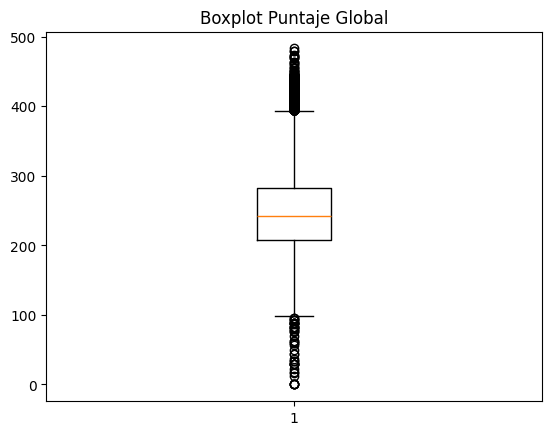

In [172]:
import matplotlib.pyplot as plt

plt.boxplot(df['punt_global'])
plt.title('Boxplot Puntaje Global')
plt.show()

# Descargar subconjunto limpio

Ya con los datos revisados y limpios, podemos descargar el nuevo archivo con los nuevos datos para poder utilizar en el analisis de datos posterior.

In [173]:
df.to_csv("saber11_limpio.csv", index=False)
from google.colab import files
files.download("saber11_limpio.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>